In [1]:
import polars as pl
import os
from pathlib import Path
import pandas as pd
import hvplot.polars
import datetime
import matplotlib.pyplot as plt
import numpy as np


sso_data = Path.cwd().parent / "Data/Option_data/SSO_complete.csv"
parquet_file = (Path.cwd().parent / "Data/Option_data/SSO_complete")

data_path = Path.cwd().parent / "Data"

#Restrictions
timeperiod = [datetime.datetime(2019, 1, 1), datetime.datetime(2021, 12, 31)]
volume_r = 0
open_interest_r = 0
delta_r = 0
vega_r = 0
theta_r = 0
gamma_r = 0
midprice_r = 0.3
bid_price_r = 0.0
days_till_exp_r1 = 9
days_till_exp_r2 = 365
moneyness_min = -8
moneyness_max = 5



In [2]:
# pl.read_csv(sso_data, separator = ",").estimated_size("mb")

In [3]:
df = pl.scan_csv(sso_data, separator=",")
df.schema
df.fetch(1000)

shape: (1_000, 19)
┌────────────┬───────────┬─────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ date       ┆ exdate    ┆ cp_flag ┆ strike_pr ┆ … ┆ index_fla ┆ issuer    ┆ div_conve ┆ exercise_ │
│ ---        ┆ ---       ┆ ---     ┆ ice       ┆   ┆ g         ┆ ---       ┆ ntion     ┆ style     │
│ str        ┆ str       ┆ str     ┆ ---       ┆   ┆ ---       ┆ str       ┆ ---       ┆ ---       │
│            ┆           ┆         ┆ i64       ┆   ┆ i64       ┆           ┆ str       ┆ str       │
╞════════════╪═══════════╪═════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2016-01-04 ┆ 2016-01-0 ┆ C       ┆ 1000000   ┆ … ┆ 0         ┆ AMAZON.CO ┆ null      ┆ A         │
│            ┆ 8         ┆         ┆           ┆   ┆           ┆ M INC.    ┆           ┆           │
│ 2016-01-04 ┆ 2016-01-0 ┆ C       ┆ 400000    ┆ … ┆ 0         ┆ AMAZON.CO ┆ null      ┆ A         │
│            ┆ 8         ┆         ┆           ┆   ┆           ┆ M INC.    ┆           ┆           │
│ 2016-01-04 ┆ 2016-01-0 ┆ C       ┆ 410000    ┆ … ┆ 0         ┆ AMAZON.CO ┆ null      ┆ A         │
│            ┆ 8         ┆         ┆           ┆   ┆           ┆ M INC.    ┆           ┆           │
│ 2016-01-04 ┆ 2016-01-0 ┆ C       ┆ 420000    ┆ … ┆ 0         ┆ AMAZON.CO ┆ null      ┆ A         │
│            ┆ 8         ┆         ┆           ┆   ┆           ┆ M INC.    ┆           ┆           │
│ 2016-01-04 ┆ 2016-01-0 ┆ C       ┆ 430000    ┆ … ┆ 0         ┆ AMAZON.CO ┆ null      ┆ A         │
│            ┆ 8         ┆         ┆           ┆   ┆           ┆ M INC.    ┆           ┆           │
│ …          ┆ …         ┆ …       ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ 2016-01-04 ┆ 2016-02-0 ┆ C       ┆ 702500    ┆ … ┆ 0         ┆ AMAZON.CO ┆ null      ┆ A         │
│            ┆ 5         ┆         ┆           ┆   ┆           ┆ M INC.    ┆           ┆           │
│ 2016-01-04 ┆ 2016-02-0 ┆ C       ┆ 705000    ┆ … ┆ 0         ┆ AMAZON.CO ┆ null      ┆ A         │
│            ┆ 5         ┆         ┆           ┆   ┆           ┆ M INC.    ┆           ┆           │
│ 2016-01-04 ┆ 2016-02-0 ┆ C       ┆ 710000    ┆ … ┆ 0         ┆ AMAZON.CO ┆ null      ┆ A         │
│            ┆ 5         ┆         ┆           ┆   ┆           ┆ M INC.    ┆           ┆           │
│ 2016-01-04 ┆ 2016-02-0 ┆ C       ┆ 715000    ┆ … ┆ 0         ┆ AMAZON.CO ┆ null      ┆ A         │
│            ┆ 5         ┆         ┆           ┆   ┆           ┆ M INC.    ┆           ┆           │
│ 2016-01-04 ┆ 2016-02-0 ┆ C       ┆ 720000    ┆ … ┆ 0         ┆ AMAZON.CO ┆ null      ┆ A         │
│            ┆ 5         ┆         ┆           ┆   ┆           ┆ M INC.    ┆           ┆           │
└────────────┴───────────┴─────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

# Lower the data by use of efficiency and formatting

In [4]:
df.collect().approx_n_unique()

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_23615/3377993439.py:1: DeprecationWarning: `approx_n_unique` is deprecated. Use `select(pl.all().approx_n_unique())` instead.
  df.collect().approx_n_unique()


shape: (1, 19)
┌──────┬────────┬─────────┬──────────────┬───┬────────────┬────────┬───────────────┬───────────────┐
│ date ┆ exdate ┆ cp_flag ┆ strike_price ┆ … ┆ index_flag ┆ issuer ┆ div_conventio ┆ exercise_styl │
│ ---  ┆ ---    ┆ ---     ┆ ---          ┆   ┆ ---        ┆ ---    ┆ n             ┆ e             │
│ u32  ┆ u32    ┆ u32     ┆ u32          ┆   ┆ u32        ┆ u32    ┆ ---           ┆ ---           │
│      ┆        ┆         ┆              ┆   ┆            ┆        ┆ u32           ┆ u32           │
╞══════╪════════╪═════════╪══════════════╪═══╪════════════╪════════╪═══════════════╪═══════════════╡
│ 1518 ┆ 331    ┆ 2       ┆ 1974         ┆ … ┆ 1          ┆ 11     ┆ 1             ┆ 1             │
└──────┴────────┴─────────┴──────────────┴───┴────────────┴────────┴───────────────┴───────────────┘

In [5]:
#Desired data types for the columns
int_cols = ["strike_price", "volume", "open_interest"]
float_cols = ["best_bid", "best_offer", "impl_volatility", "delta", "gamma", "vega", "theta"]
datetime_cols = ["date","exdate"]
str_cols = ["cp_flag", "ticker", "exercise_style"]
drop_cols = ["optionid", "index_flag", "issuer", "div_convention", "exercise_style"]

In [6]:
#one line to do all the above
df = df.with_columns(
    [ pl.col(int_cols).cast(pl.Int64),
      pl.col(float_cols).cast(pl.Float64),
      pl.col(datetime_cols).cast(pl.Date),
      pl.col(str_cols).cast(pl.String),
    ]
).drop(drop_cols)

In [7]:
df.fetch(5)

shape: (5, 14)
┌────────────┬────────────┬─────────┬──────────────┬───┬──────────┬──────────┬───────────┬────────┐
│ date       ┆ exdate     ┆ cp_flag ┆ strike_price ┆ … ┆ gamma    ┆ vega     ┆ theta     ┆ ticker │
│ ---        ┆ ---        ┆ ---     ┆ ---          ┆   ┆ ---      ┆ ---      ┆ ---       ┆ ---    │
│ date       ┆ date       ┆ str     ┆ i64          ┆   ┆ f64      ┆ f64      ┆ f64       ┆ str    │
╞════════════╪════════════╪═════════╪══════════════╪═══╪══════════╪══════════╪═══════════╪════════╡
│ 2016-01-04 ┆ 2016-01-08 ┆ C       ┆ 1000000      ┆ … ┆ 0.000173 ┆ 1.300576 ┆ -100.3955 ┆ AMZN   │
│ 2016-01-04 ┆ 2016-01-08 ┆ C       ┆ 400000       ┆ … ┆ null     ┆ null     ┆ null      ┆ AMZN   │
│ 2016-01-04 ┆ 2016-01-08 ┆ C       ┆ 410000       ┆ … ┆ null     ┆ null     ┆ null      ┆ AMZN   │
│ 2016-01-04 ┆ 2016-01-08 ┆ C       ┆ 420000       ┆ … ┆ null     ┆ null     ┆ null      ┆ AMZN   │
│ 2016-01-04 ┆ 2016-01-08 ┆ C       ┆ 430000       ┆ … ┆ null     ┆ null     ┆ null      ┆ AMZN   │
└────────────┴────────────┴─────────┴──────────────┴───┴──────────┴──────────┴───────────┴────────┘

## Apply filter for volume and open interest

In [8]:
# df.filter((pl.col("volume") > 0) & (pl.col("open_interest") > 0)).collect()

In [9]:
# Saving file
data_path_parq = Path.cwd().parent / "Data/Option_data/sso_complete.parquet"

save_parquet = False
if save_parquet or not os.path.exists(data_path_parq):
    df.sink_parquet(data_path_parq)

# Applying the different filters 
- Time period from 2019 - 2022
- 0 to 7 days experiy
- moneyness from 0.8 to 1.2

In [10]:
df2 = pl.read_parquet(data_path_parq)

dfp = df2.to_pandas()

#Create 1-day before IV
dfp['Prev_day_IV'] = dfp.groupby(['ticker', 'strike_price'])['impl_volatility'].shift(1).fillna(0)
df = pl.from_pandas(dfp)

In [11]:
df
# print(type(df))

shape: (31_869_752, 15)
┌─────────────┬────────────┬─────────┬────────────┬───┬──────────┬───────────┬────────┬────────────┐
│ date        ┆ exdate     ┆ cp_flag ┆ strike_pri ┆ … ┆ vega     ┆ theta     ┆ ticker ┆ Prev_day_I │
│ ---         ┆ ---        ┆ ---     ┆ ce         ┆   ┆ ---      ┆ ---       ┆ ---    ┆ V          │
│ datetime[ms ┆ datetime[m ┆ str     ┆ ---        ┆   ┆ f64      ┆ f64       ┆ str    ┆ ---        │
│ ]           ┆ s]         ┆         ┆ i64        ┆   ┆          ┆           ┆        ┆ f64        │
╞═════════════╪════════════╪═════════╪════════════╪═══╪══════════╪═══════════╪════════╪════════════╡
│ 2016-01-04  ┆ 2016-01-08 ┆ C       ┆ 1000000    ┆ … ┆ 1.300576 ┆ -100.3955 ┆ AMZN   ┆ 0.0        │
│ 00:00:00    ┆ 00:00:00   ┆         ┆            ┆   ┆          ┆           ┆        ┆            │
│ 2016-01-04  ┆ 2016-01-08 ┆ C       ┆ 400000     ┆ … ┆ null     ┆ null      ┆ AMZN   ┆ 0.0        │
│ 00:00:00    ┆ 00:00:00   ┆         ┆            ┆   ┆          ┆           ┆        ┆            │
│ 2016-01-04  ┆ 2016-01-08 ┆ C       ┆ 410000     ┆ … ┆ null     ┆ null      ┆ AMZN   ┆ 0.0        │
│ 00:00:00    ┆ 00:00:00   ┆         ┆            ┆   ┆          ┆           ┆        ┆            │
│ 2016-01-04  ┆ 2016-01-08 ┆ C       ┆ 420000     ┆ … ┆ null     ┆ null      ┆ AMZN   ┆ 0.0        │
│ 00:00:00    ┆ 00:00:00   ┆         ┆            ┆   ┆          ┆           ┆        ┆            │
│ 2016-01-04  ┆ 2016-01-08 ┆ C       ┆ 430000     ┆ … ┆ null     ┆ null      ┆ AMZN   ┆ 0.0        │
│ 00:00:00    ┆ 00:00:00   ┆         ┆            ┆   ┆          ┆           ┆        ┆            │
│ …           ┆ …          ┆ …       ┆ …          ┆ … ┆ …        ┆ …         ┆ …      ┆ …          │
│ 2021-12-31  ┆ 2024-01-19 ┆ P       ┆ 580000     ┆ … ┆ 109.8577 ┆ -6.577525 ┆ META   ┆ 0.341872   │
│ 00:00:00    ┆ 00:00:00   ┆         ┆            ┆   ┆          ┆           ┆        ┆            │
│ 2021-12-31  ┆ 2024-01-19 ┆ P       ┆ 590000     ┆ … ┆ 103.475  ┆ -6.100265 ┆ META   ┆ 0.336868   │
│ 00:00:00    ┆ 00:00:00   ┆         ┆            ┆   ┆          ┆           ┆        ┆            │
│ 2021-12-31  ┆ 2024-01-19 ┆ P       ┆ 600000     ┆ … ┆ 98.87241 ┆ -5.810699 ┆ META   ┆ 0.331008   │
│ 00:00:00    ┆ 00:00:00   ┆         ┆            ┆   ┆          ┆           ┆        ┆            │
│ 2021-12-31  ┆ 2024-01-19 ┆ P       ┆ 650000     ┆ … ┆ 74.16985 ┆ -4.265754 ┆ META   ┆ 0.340944   │
│ 00:00:00    ┆ 00:00:00   ┆         ┆            ┆   ┆          ┆           ┆        ┆            │
│ 2021-12-31  ┆ 2024-01-19 ┆ P       ┆ 700000     ┆ … ┆ 50.40699 ┆ -2.878185 ┆ META   ┆ 0.348584   │
│ 00:00:00    ┆ 00:00:00   ┆         ┆            ┆   ┆          ┆           ┆        ┆            │
└─────────────┴────────────┴─────────┴────────────┴───┴──────────┴───────────┴────────┴────────────┘

In [12]:
# #Creating a filter for missing greeks
df = df.filter((pl.col("delta") > delta_r) | (pl.col("gamma") > gamma_r) | (pl.col("vega") > vega_r) | (pl.col("theta") > theta_r))

# Creating the date filter period
df = df.filter(
    pl.col("exdate").is_between(timeperiod[0], timeperiod[1]),
)
df = df.filter(
    pl.col("date").is_between(timeperiod[0], timeperiod[1]),
)

# Creating the days_till_experire collumn and filter time to maturity
df = df.with_columns(
    days_till_exp = pl.col("exdate").cast(pl.Date) - pl.col("date").cast(pl.Date)
).sort("cp_flag").sort("date")

df = df.with_columns(
    days_till_exp = pl.col("days_till_exp").dt.days()
)

df = df.filter(pl.col("days_till_exp") <= days_till_exp_r2)
# #Creating a filter for the volume and open_interest
# df = df.filter((pl.col("volume") > volume_r) & (pl.col("open_interest") > open_interest_r))

# #Create filter for bid higher than ask price
# df = df.filter(pl.col("best_bid") <= pl.col("best_offer"))
# df = df.filter(pl.col("best_bid") >= bid_price_r)

# #Creating a midprices column
# df = df.with_columns(
#     bid_diff = pl.col("best_offer").sub(pl.col("best_bid").cast(pl.Float64)) 
# ).sort("cp_flag").sort("date")

# #Filter for the midprice
# # df = df.filter(pl.col("bid_diff") <= midprice_r)



/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_23615/3840505329.py:18: DeprecationWarning: `days` is deprecated. It has been renamed to `total_days`.
  days_till_exp = pl.col("days_till_exp").dt.days()


In [13]:
print(type(df))

<class 'polars.dataframe.frame.DataFrame'>


## Create a graph of the days till expiry and implied volatility of a specific stock for a strike price

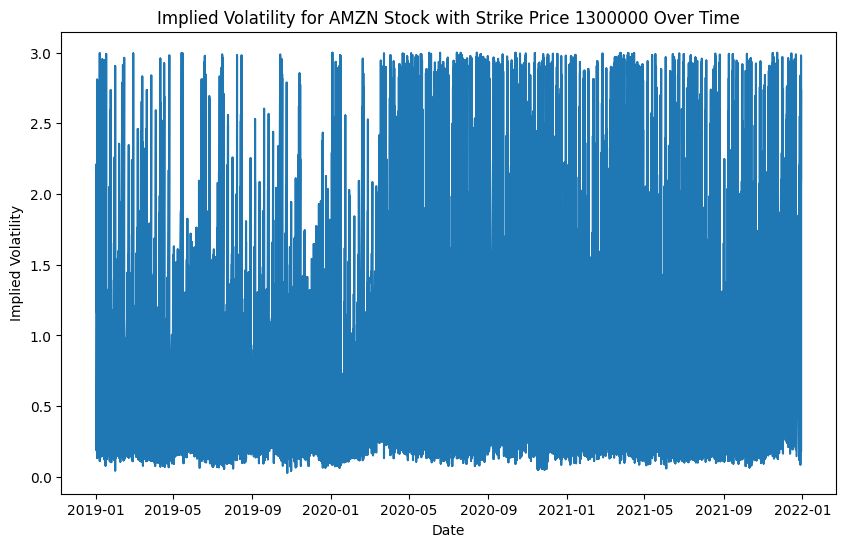

In [14]:
# Filter the DataFrame
df_pandas = df.to_pandas()

filtered_df = df_pandas[(df_pandas['ticker'] == 'COST')]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['date'], filtered_df['impl_volatility'])
plt.title('Implied Volatility for AMZN Stock with Strike Price 1300000 Over Time')
plt.xlabel('Date')
plt.ylabel('Implied Volatility')
plt.show()

In [15]:
# df_days6 = df_pandas[df_pandas['days_till_exp'] == 6]
# df_days6

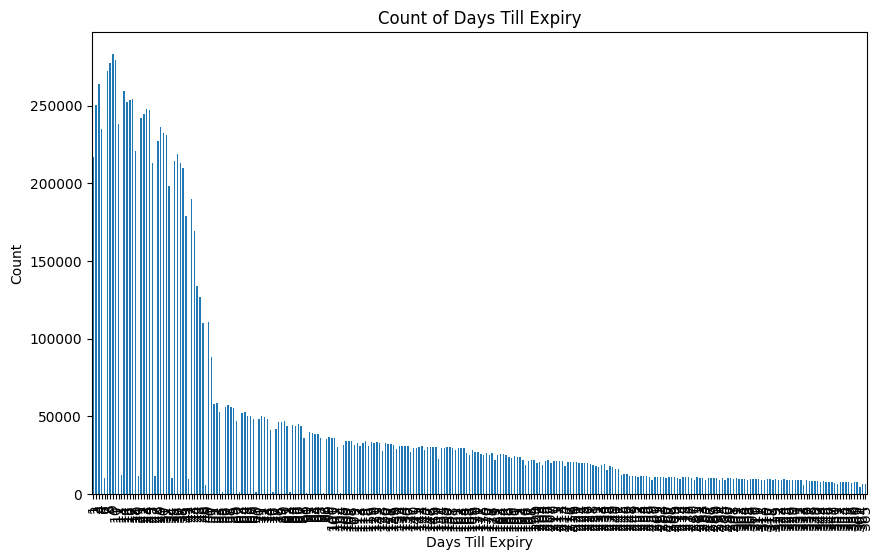

In [16]:
# Get the counts of 'days_till_exp'
counts = df_pandas['days_till_exp'].value_counts()

# Sort the index
counts = counts.sort_index()

# Create the bar plot
counts.plot(kind='bar', figsize=(10, 6))
plt.title('Count of Days Till Expiry')
plt.xlabel('Days Till Expiry')
plt.ylabel('Count')
plt.show()

# Merging the stock prices with the options

In [17]:
stock_path_parq = Path.cwd().parent / "Data/Stock_data/stock_data.parquet"
df_stock = pl.read_parquet(stock_path_parq)

# Convert Polars dataframes to pandas
df = df.to_pandas()
df_stock = df_stock.to_pandas()

# Ensure that 'date' is a datetime object in both dataframes
df['date'] = pd.to_datetime(df['date'])
df_stock['date'] = pd.to_datetime(df_stock['date'])

# Rename the 'TICKER' column in df_stock to 'ticker' to match df
df_stock = df_stock.rename(columns={'TICKER': 'ticker'})

# Merge 'RET' column from df_stock into df
merged_df = pd.merge(df, df_stock[['ticker', 'date', 'PRC', 'PRC_actual']], on=['ticker', 'date'], how='left')


## Create the forward price of the stocks

In [18]:
# Load the existing firm and market data
df_firm = merged_df  # Replace with your path
df_macro = pd.read_parquet(Path.cwd().parent / "Data/Macroeconomic_variables/merged_marcofirm.parquet")  # Replace with your path

# Load the dividend data
df_dividends = pd.read_csv(Path.cwd().parent / 'Data/Stock_data/Dividend_Data_2019_2022.csv')  # Replace with your path

# Convert the DATE column to datetime format for easy merging
df_macro['DATE'] = pd.to_datetime(df_macro['DATE'])

# Calculate the annual dividend yield by grouping by ticker and summing the dividends per year
df_dividends['Date'] = pd.to_datetime(df_dividends['Date'])
df_dividends['Year'] = df_dividends['Date'].dt.year
annual_dividends = df_dividends.groupby(['Ticker', 'Year'])['Amount'].sum().reset_index()
annual_dividends['Annual_Dividend_Yield'] = annual_dividends['Amount'] / df_firm['PRC']

# Merge the annual dividend yield back to the firm data
df_firm['Year'] = df_firm['date'].dt.year
df_firm = df_firm.rename(columns={'ticker': 'Ticker'})
df_firm = df_firm.merge(annual_dividends[['Ticker', 'Year', 'Annual_Dividend_Yield']], 
                        on=['Ticker', 'Year'], how='left')

# Fill NaN values in 'Annual_Dividend_Yield' with 0
df_firm['Annual_Dividend_Yield'] = df_firm['Annual_Dividend_Yield'].fillna(0)

# Calculate time to maturity in years
df_firm['T'] = df_firm['days_till_exp'] / 365

# Interpolate the 2Y bond rates for exact dates of the firm data
df_firm['DATE'] = df_firm['date']
df_firm = df_firm.merge(df_macro[['DATE', '2Y_bond']], on='DATE', how='left')
df_firm['2Y_bond'].interpolate(method='time', inplace=True)

# Convert '2Y_bond' and 'Annual_Dividend_Yield' to float
df_firm['2Y_bond'] = df_firm['2Y_bond'].astype(float)
df_firm['Annual_Dividend_Yield'] = df_firm['Annual_Dividend_Yield'].astype(float)

# Calculate forward prices using the formula F = P * e^(r - q)T
df_firm['Forward_Price'] = df_firm['PRC'] * np.exp(((df_firm['2Y_bond']/100) - df_firm['Annual_Dividend_Yield']) * df_firm['T'])

# Save the updated dataframe with the Forward Price column
# updated_file_path = "/mnt/data/Updated_Firm_Data.csv"
# df_firm.to_csv(updated_file_path, index=False)


/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_23615/3990093447.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_firm['2Y_bond'].interpolate(method='time', inplace=True)
/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_23615/3990093447.py:32: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_firm['2Y_bond'].interpolate(method='time', inplace=True)


In [19]:
df_firm

date     exdate cp_flag  strike_price  best_bid  best_offer  \
0        2019-01-02 2019-01-04       C       1050000    486.00      494.00   
1        2019-01-02 2019-01-04       C       1070000    466.00      474.00   
2        2019-01-02 2019-01-04       C       1100000    436.40      444.50   
3        2019-01-02 2019-01-04       C       1140000    396.40      404.50   
4        2019-01-02 2019-01-04       C       1150000    386.40      394.50   
...             ...        ...     ...           ...       ...         ...   
13053312 2021-12-30 2021-12-31       P        445000    100.85      101.30   
13053313 2021-12-30 2021-12-31       P        450000    105.85      106.30   
13053314 2021-12-30 2021-12-31       P        460000    115.85      116.15   
13053315 2021-12-30 2021-12-31       P        470000    125.80      126.15   
13053316 2021-12-30 2021-12-31       P        480000    135.85      136.15   

          volume  open_interest  impl_volatility     delta  ...  Prev_day_IV  \
0              1              1         2.230825  0.991809  ...     0.399203   
1              0              1         2.130939  0.991473  ...     0.396330   
2              4              3         2.119591  0.986823  ...     0.348630   
3              0              2         1.918916  0.985593  ...     0.349888   
4              0              2         1.869618  0.985253  ...     0.385985   
...          ...            ...              ...       ...  ...          ...   
13053312       0              0         2.461917 -0.972946  ...     1.514197   
13053313       0              0         2.549802 -0.973737  ...     1.574435   
13053314       0              0         2.645381 -0.978455  ...     1.692340   
13053315       0              0         2.779254 -0.980613  ...     1.806996   
13053316       0              0         2.965491 -0.980445  ...     1.918596   

          days_till_exp         PRC PRC_actual  Year  Annual_Dividend_Yield  \
0                     2  1539.13000   76.95650  2019                    0.0   
1                     2  1539.13000   76.95650  2019                    0.0   
2                     2  1539.13000   76.95650  2019                    0.0   
3                     2  1539.13000   76.95650  2019                    0.0   
4                     2  1539.13000   76.95650  2019                    0.0   
...                 ...         ...        ...   ...                    ...   
13053312              1   344.35999  344.35999  2021                    0.0   
13053313              1   344.35999  344.35999  2021                    0.0   
13053314              1   344.35999  344.35999  2021                    0.0   
13053315              1   344.35999  344.35999  2021                    0.0   
13053316              1   344.35999  344.35999  2021                    0.0   

                 T       DATE  2Y_bond  Forward_Price  
0         0.005479 2019-01-02   2.5442    1539.344582  
1         0.005479 2019-01-02   2.5442    1539.344582  
2         0.005479 2019-01-02   2.5442    1539.344582  
3         0.005479 2019-01-02   2.5442    1539.344582  
4         0.005479 2019-01-02   2.5442    1539.344582  
...            ...        ...      ...            ...  
13053312  0.002740 2021-12-30   0.8076     344.367609  
13053313  0.002740 2021-12-30   0.8076     344.367609  
13053314  0.002740 2021-12-30   0.8076     344.367609  
13053315  0.002740 2021-12-30   0.8076     344.367609  
13053316  0.002740 2021-12-30   0.8076     344.367609  

[13053317 rows x 24 columns]

## Create the moneyness column

In [20]:
df_firm['moneyness'] = np.log((df_firm['strike_price']/1000) / df_firm['Forward_Price']) / \
                       np.sqrt(df_firm['T'] * df_firm['impl_volatility'])

# Optionally save the updated DataFrame to a new CSV
# df_firm.to_csv('updated_dataframe_with_moneyness.csv', index=False)

# Print the DataFrame or specific columns to verify the moneyness calculations
print(df_firm[['strike_price', 'Forward_Price', 'T', 'Prev_day_IV', 'moneyness']])

          strike_price  Forward_Price         T  Prev_day_IV  moneyness
0              1050000    1539.344582  0.005479     0.399203  -3.460236
1              1070000    1539.344582  0.005479     0.396330  -3.365789
2              1100000    1539.344582  0.005479     0.348630  -3.118206
3              1140000    1539.344582  0.005479     0.349888  -2.928869
4              1150000    1539.344582  0.005479     0.385985  -2.880944
...                ...            ...       ...          ...        ...
13053312        445000     344.367609  0.002740     1.514197   3.121532
13053313        450000     344.367609  0.002740     1.574435   3.200947
13053314        460000     344.367609  0.002740     1.692340   3.400760
13053315        470000     344.367609  0.002740     1.806996   3.564304
13053316        480000     344.367609  0.002740     1.918596   3.684140

[13053317 rows x 5 columns]


# Create a few filters for the dataframe and an overview

In [21]:
#Create moneyness filter
pl_merged = pl.from_pandas(df_firm)

pl_merged = pl_merged.filter((pl.col("moneyness") >= moneyness_min) & (pl.col("moneyness") <= moneyness_max))

pd_merged = pl_merged.to_pandas()


In [22]:
df = pd_merged

# Define maturity ranges for tau (τ)
bins = [0, 9, 60, 180, float('inf')]  # upper bounds are exclusive except the last
labels = ['τ ≤ 9', '9 < τ ≤ 60', '60 < τ ≤ 180', 'τ > 180']
df['maturity_group'] = pd.cut(df['days_till_exp'], bins=bins, labels=labels, right=True)

# Define m categories based on delta (adjust as needed)
def classify_m(delta):
    if delta < -2:
        return 'm < -2'
    elif -2 <= delta <= 2:
        return '|m| ≤ 2'
    else:
        return 'm > 2'

df['m_category'] = df['moneyness'].apply(classify_m)

# Calculate Number of Contracts (%) and Volume (%)
# Group by maturity group and m category, then calculate counts and volume sums
summary = df.groupby(['maturity_group', 'm_category']).agg(
    Number_of_contracts=pd.NamedAgg(column='date', aggfunc='count'),  # Assuming each row is a contract
    Volume=pd.NamedAgg(column='volume', aggfunc='sum')
)

# Calculate percentages
total_contracts = summary['Number_of_contracts'].sum()
total_volume = summary['Volume'].sum()
summary['Number_of_contracts (%)'] = (summary['Number_of_contracts'] / total_contracts) * 100
summary['Volume (%)'] = (summary['Volume'] / total_volume) * 100

# Pivot table with reset index for adding totals
result = summary.pivot_table(index='maturity_group', columns='m_category', 
                             values=['Number_of_contracts (%)', 'Volume (%)'], 
                             fill_value=0).swaplevel(axis=1).sort_index(axis=1)

# Add totals across all columns and rows
result.loc['Total', :] = result.sum()
result['Total'] = result.sum(axis=1)

print(result)

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_23615/1451908633.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(['maturity_group', 'm_category']).agg(


m_category                      m < -2                              m > 2  \
               Number_of_contracts (%) Volume (%) Number_of_contracts (%)   
maturity_group                                                              
τ ≤ 9                         3.096049   2.105617                1.914400   
9 < τ ≤ 60                    5.117980   0.752973                1.292560   
60 < τ ≤ 180                  1.754102   0.146414                0.101557   
τ > 180                       0.580673   0.045723                0.003519   
Total                        10.548804   3.050727                3.312037   

m_category                                |m| ≤ 2                  Total  
               Volume (%) Number_of_contracts (%) Volume (%)              
maturity_group                                                            
τ ≤ 9            1.877899                8.789672  59.859094   77.642732  
9 < τ ≤ 60       0.357117               43.750805  27.256893   78.528328  
60 < τ ≤

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_23615/1451908633.py:33: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  result = summary.pivot_table(index='maturity_group', columns='m_category',


In [23]:
result

m_category                      m < -2                              m > 2  \
               Number_of_contracts (%) Volume (%) Number_of_contracts (%)   
maturity_group                                                              
τ ≤ 9                         3.096049   2.105617                1.914400   
9 < τ ≤ 60                    5.117980   0.752973                1.292560   
60 < τ ≤ 180                  1.754102   0.146414                0.101557   
τ > 180                       0.580673   0.045723                0.003519   
Total                        10.548804   3.050727                3.312037   

m_category                                |m| ≤ 2                  Total  
               Volume (%) Number_of_contracts (%) Volume (%)              
maturity_group                                                            
τ ≤ 9            1.877899                8.789672  59.859094   77.642732  
9 < τ ≤ 60       0.357117               43.750805  27.256893   78.528328  
60 < τ ≤ 180     0.011367               20.747346   5.839627   28.600412  
τ > 180          0.000651               12.851337   1.746625   15.228527  
Total            2.247034               86.139159  94.702239  200.000000

In [24]:
# Amount of observations for the given filters
# ticker_counts = pd_merged.groupby('Ticker').size()
# ticker_counts

In [25]:
import pandas as pd
import plotly.graph_objects as go

# Convert the string to a pandas Timestamp
date = pd.Timestamp('2019-03-19')

# Filter the DataFrame for the 'NVDA' ticker and the specific date
df_nvda = pd_merged[(pd_merged['Ticker'] == 'AMZN') & (pd_merged['date'] == date)]
# df_nvda = pd_merged[pd_merged['ticker'] == 'TSLA']
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_nvda['moneyness'],
    y=df_nvda['days_till_exp'],
    z=df_nvda['impl_volatility'],
    mode='markers',
    marker=dict(
        size=3,
        color=df_nvda['impl_volatility'],  # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# Set labels
fig.update_layout(scene = dict(
                    xaxis_title='Moneyness',
                    yaxis_title='Days till Expiry',
                    zaxis_title='Implied Volatility'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

In [26]:
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import plotly.graph_objects as go

# Convert the string to a pandas Timestamp
date = pd.Timestamp('2019-03-19')

# Filter the DataFrame for the 'NVDA' ticker and the specific date
df__nvda = pd_merged[(pd_merged['Ticker'] == 'AMZN') & (pd_merged['date'] == date)]
# df__nvda = pd_merged[(pd_merged['ticker'] == 'AMZN') & (pd_merged['date'] == date) & (pd_merged['cp_flag'] == 'P')]
# df_nvda = pd_merged[pd_merged['ticker'] == 'TSLA']

# Create a grid of x and y values
x = np.linspace(df__nvda['moneyness'].min(), df__nvda['moneyness'].max(), len(df__nvda['moneyness'].unique()))
y = np.linspace(df__nvda['days_till_exp'].min(), df__nvda['days_till_exp'].max(), len(df__nvda['days_till_exp'].unique()))
x_grid, y_grid = np.meshgrid(x, y)

# Interpolate z values
z_grid = griddata((df__nvda['moneyness'], df__nvda['days_till_exp']), df__nvda['impl_volatility'], (x_grid, y_grid), method='cubic')

# Create a 3D surface plot
fig = go.Figure(data=[go.Surface(x=x_grid, y=y_grid, z=z_grid, colorscale='Viridis')])

# Set labels
fig.update_layout(scene = dict(
                    xaxis_title='Moneyness',
                    yaxis_title='Days till Expiry',
                    zaxis_title='Implied Volatility'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

## Plots of the data

In [30]:
pd_merged

date     exdate cp_flag  strike_price  best_bid  best_offer  \
0        2019-01-02 2019-01-04       C       1050000    486.00      494.00   
1        2019-01-02 2019-01-04       C       1070000    466.00      474.00   
2        2019-01-02 2019-01-04       C       1100000    436.40      444.50   
3        2019-01-02 2019-01-04       C       1140000    396.40      404.50   
4        2019-01-02 2019-01-04       C       1150000    386.40      394.50   
...             ...        ...     ...           ...       ...         ...   
13041938 2021-12-30 2021-12-31       P        445000    100.85      101.30   
13041939 2021-12-30 2021-12-31       P        450000    105.85      106.30   
13041940 2021-12-30 2021-12-31       P        460000    115.85      116.15   
13041941 2021-12-30 2021-12-31       P        470000    125.80      126.15   
13041942 2021-12-30 2021-12-31       P        480000    135.85      136.15   

          volume  open_interest  impl_volatility     delta  ...  PRC_actual  \
0              1              1         2.230825  0.991809  ...    76.95650   
1              0              1         2.130939  0.991473  ...    76.95650   
2              4              3         2.119591  0.986823  ...    76.95650   
3              0              2         1.918916  0.985593  ...    76.95650   
4              0              2         1.869618  0.985253  ...    76.95650   
...          ...            ...              ...       ...  ...         ...   
13041938       0              0         2.461917 -0.972946  ...   344.35999   
13041939       0              0         2.549802 -0.973737  ...   344.35999   
13041940       0              0         2.645381 -0.978455  ...   344.35999   
13041941       0              0         2.779254 -0.980613  ...   344.35999   
13041942       0              0         2.965491 -0.980445  ...   344.35999   

          Year  Annual_Dividend_Yield         T       DATE  2Y_bond  \
0         2019                    0.0  0.005479 2019-01-02   2.5442   
1         2019                    0.0  0.005479 2019-01-02   2.5442   
2         2019                    0.0  0.005479 2019-01-02   2.5442   
3         2019                    0.0  0.005479 2019-01-02   2.5442   
4         2019                    0.0  0.005479 2019-01-02   2.5442   
...        ...                    ...       ...        ...      ...   
13041938  2021                    0.0  0.002740 2021-12-30   0.8076   
13041939  2021                    0.0  0.002740 2021-12-30   0.8076   
13041940  2021                    0.0  0.002740 2021-12-30   0.8076   
13041941  2021                    0.0  0.002740 2021-12-30   0.8076   
13041942  2021                    0.0  0.002740 2021-12-30   0.8076   

          Forward_Price  moneyness  maturity_group  m_category  
0           1539.344582  -3.460236           τ ≤ 9      m < -2  
1           1539.344582  -3.365789           τ ≤ 9      m < -2  
2           1539.344582  -3.118206           τ ≤ 9      m < -2  
3           1539.344582  -2.928869           τ ≤ 9      m < -2  
4           1539.344582  -2.880944           τ ≤ 9      m < -2  
...                 ...        ...             ...         ...  
13041938     344.367609   3.121532           τ ≤ 9       m > 2  
13041939     344.367609   3.200947           τ ≤ 9       m > 2  
13041940     344.367609   3.400760           τ ≤ 9       m > 2  
13041941     344.367609   3.564304           τ ≤ 9       m > 2  
13041942     344.367609   3.684140           τ ≤ 9       m > 2  

[13041943 rows x 27 columns]

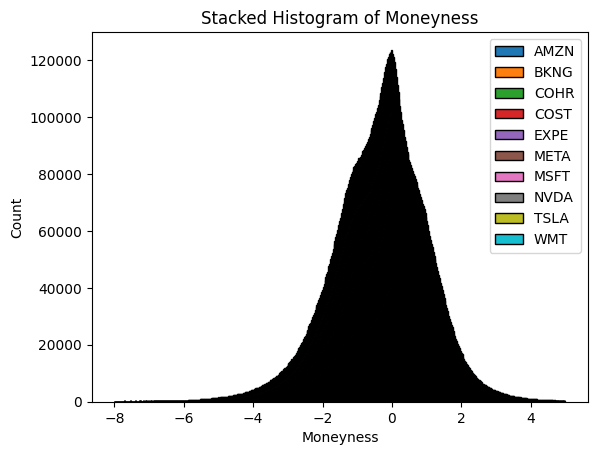

In [31]:
# Group the DataFrame by the 'ticker' column
grouped = pd_merged.groupby('Ticker')

# Create a list of data for each group
data = [group['moneyness'] for name, group in grouped]

# Create a list of labels for each group
labels = [name for name, group in grouped]

# Create a stacked histogram
plt.hist(data, bins=500, stacked=True, edgecolor='black', label=labels)

# Set the title and labels
plt.title('Stacked Histogram of Moneyness')
plt.xlabel('Moneyness')
plt.ylabel('Count')

# Set the x-limits
# plt.xlim(0, 2)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [33]:
# # Group the DataFrame by the 'ticker' column
# grouped = pd_merged.groupby('Ticker')

# # Create a list of data for each group
# data = [group['bid_diff'] for name, group in grouped]

# # Create a list of labels for each group
# labels = [name for name, group in grouped]

# # Create a stacked histogram
# plt.hist(data, bins=500, stacked=True, edgecolor='black', label=labels)

# # Set the title and labels
# plt.title('Stacked Histogram of mid-price')
# plt.xlabel('mid-price')
# plt.ylabel('Count')

# # Set the x-limits
# plt.xlim(0, 0.35)

# # Add a legend
# plt.legend()

# # Show the plot
# plt.show()

In [ ]:
# print(type(merged_df))
# sso_info = merged_df[merged_df['ticker'] == 'AMZN']

# sso_info

# Create implied volatility surface